<a href="https://colab.research.google.com/github/AugustoBonifacio001/AugustoBonifacio001/blob/main/teste_reconstrucao_de_sinais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-e66b03629308>:27: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t[:num_amostras], x_amostrado, label='Sinal amostrado', basefmt =" ", use_line_collection=True)


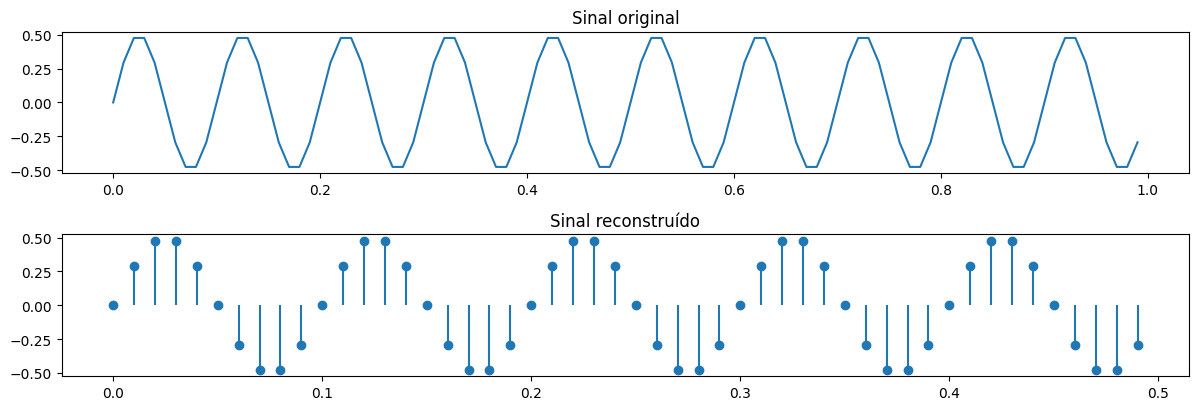

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

f1= 5
f2 =10
fs =100  #frequência de amostragem
t = np.arange(0,1, 1/fs) #tempo de 0 até 1 segundos com taxa de amostragem de fs

x = np.sin(2*np.pi*f1) + 0.5*np.sin(2*np.pi*f2*t)

#amostragem

num_amostras = 50
x_amostrado = x[:num_amostras]
X_amostrado = fft(x_amostrado)
x_reconstruido = ifft(X_amostrado)

plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
plt.subplot(3,1,1)
plt.plot(t, x, label='Sinal Original')
plt.title('Sinal original')

plt.subplot(3,1,2)
plt.stem(t[:num_amostras], x_amostrado, label='Sinal amostrado', basefmt =" ", use_line_collection=True)
plt.title('Sinal reconstruído')

plt.tight_layout()
plt.show()


<ipython-input-2-60e93a3d52f3>:22: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t, x_amostrado, label='Sinal Amostrado', basefmt=" ", use_line_collection = True)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


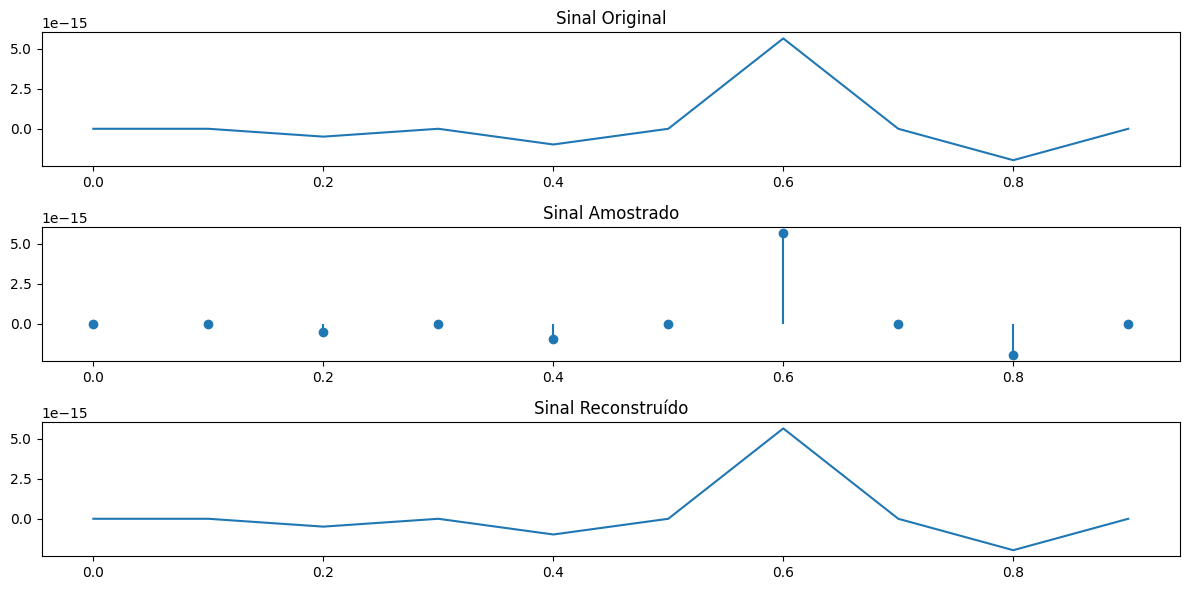

In [ ]:
f1=5
f2=10
f_max = max(f1, f1)
fs = 2*f_max
t= np.arange(0,1, 1/fs)
x= np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)

num_amostras = len(t)
x_amostrado =x
X_amostrado = fft(x_amostrado)
x_reconstruido = ifft(X_amostrado)

plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
plt.plot(t, x, label ='Sinal Original')
plt.title('Sinal Original')



plt.subplot(3,1,2)
plt.stem(t, x_amostrado, label='Sinal Amostrado', basefmt=" ", use_line_collection = True)
plt.title('Sinal Amostrado')

plt.subplot(3, 1, 3)
plt.plot(t, x_reconstruido, label='Sinal Reconstruido ')
plt.title('Sinal Reconstruído')

plt.tight_layout()
plt.show()



O tamanho da amostra original é de:20


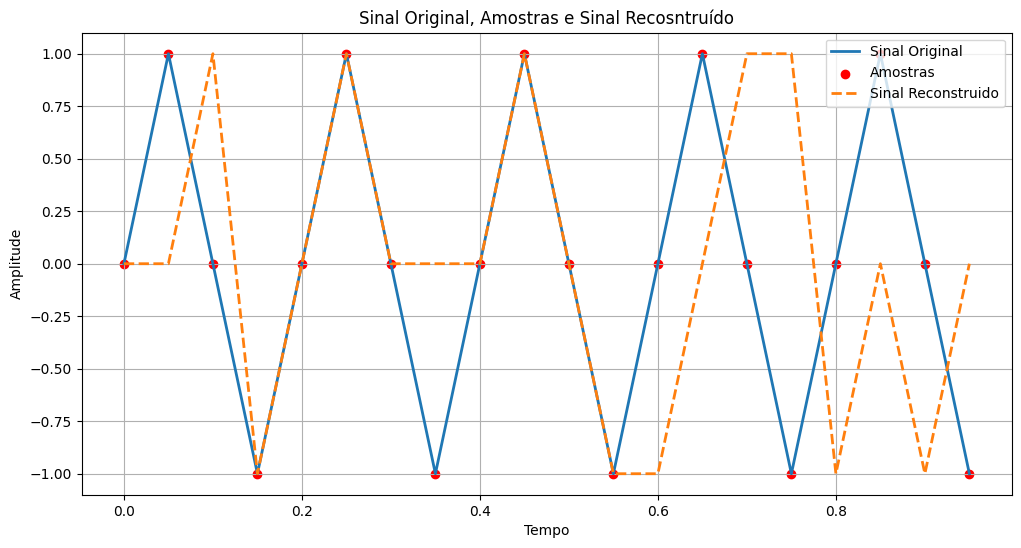

In [ ]:
f1=5
f2=10
f_max=max(f1, f2)
fs= 2*f_max
t= np.arange(0,1, 1/fs)
x_original = np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)

t_tamanho_da_amostra= len(x_original)
print(f"O tamanho da amostra original é de:{t_tamanho_da_amostra}")

num_amostras_reduzido=20
indices_amostragem = np.random.choice(len(t), num_amostras_reduzido, replace=False)
t_amostrado= t[indices_amostragem]
x_amostrado= x_original[indices_amostragem]
X_amostrado= fft(x_amostrado)
x_reconstruido= ifft(X_amostrado)

plt.figure(figsize=(12,6))
plt.plot(t, x_original, label='Sinal Original', linewidth=2)
plt.scatter(t_amostrado, x_amostrado, color='red', label='Amostras')
plt.plot(t, x_reconstruido, label='Sinal Reconstruido', linestyle='dashed', linewidth=2)
plt.title('Sinal Original, Amostras e Sinal Recosntruído')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit


ValueError: ignored

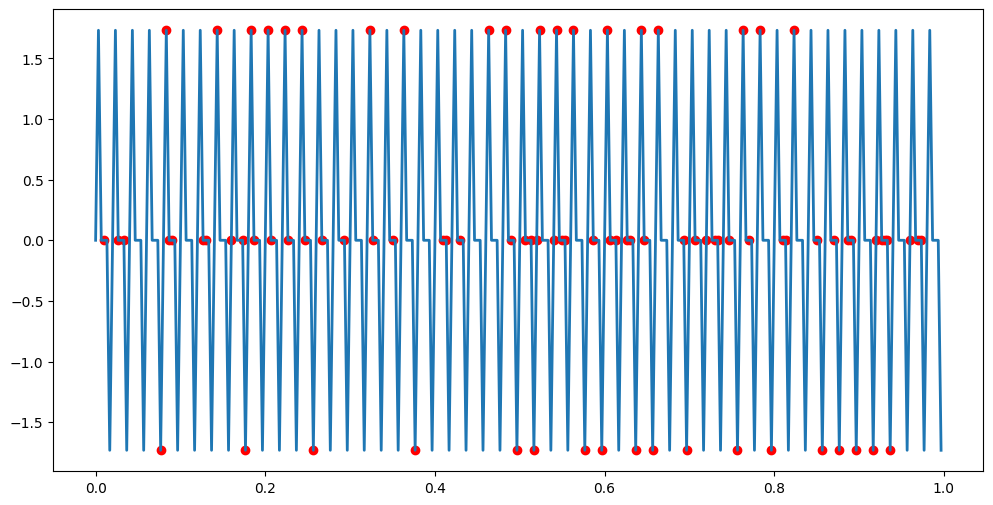

In [16]:
f1 = 50
f2 = 100
f3 = 150
f_max = max(f1, f2, f3)
fs = 2*f_max

t= np.arange(0,1,1/fs)
x_original = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)

num_amostras = len(t)

amostras_indices = np.random.choice(num_amostras , int(0.3*num_amostras), replace = False)
X_amostrado = x_original[amostras_indices]

Pi = np.eye(num_amostras)[amostras_indices,:]

omp = OrthogonalMatchingPursuit(n_nonzero_coefs=len(amostras_indices))
omp.fit(Pi, X_amostrado)
coeficientes_reconstruidos = omp.coef_
coeficientes_recontruidos = coeficientes_reconstruidos.reshape(-1,1)

Pi_transposta = Pi.T

x_reconstruido_omp = np.dot(Pi, coeficientes_reconstruidos.T)

plt.figure(figsize=(12,6))
plt.plot(t, x_original, label='Sinal Original', linewidth =2)
plt.scatter(t[amostras_indices], X_amostrado, color='red', label='Amostras')
plt.plot(t, x_reconstruido_omp, label = 'Sinal Recontruido (OMP)', linestyle='dashed', linewidth=2)

plt.title('Recontrução de Sinal Utilizando OMP')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(


ValueError: ignored

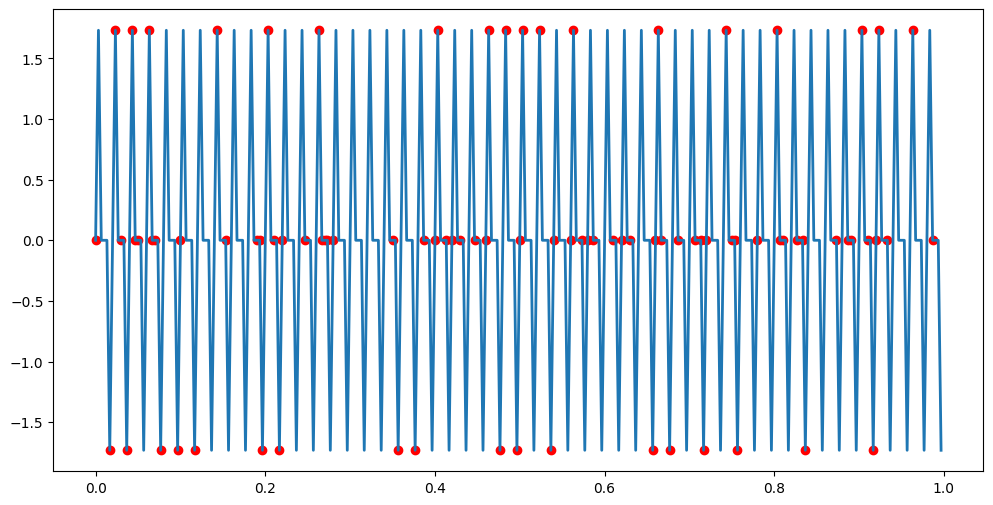

In [21]:
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
import matplotlib.pyplot as plt

f1 = 50
f2 = 100
f3 = 150
f_max = max(f1, f2, f3)
fs = 2 * f_max

t = np.arange(0, 1, 1/fs)
x_original = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t)

num_amostras = len(t)

amostras_indices = np.random.choice(num_amostras, int(0.3 * num_amostras), replace=False)
X_amostrado = x_original[amostras_indices]

Pi = np.eye(num_amostras)[amostras_indices, :]

omp = OrthogonalMatchingPursuit(n_nonzero_coefs=len(amostras_indices))
omp.fit(Pi, X_amostrado)
coeficientes_reconstruidos = omp.coef_
coeficientes_reconstruidos = coeficientes_reconstruidos.reshape(-1, 1)

Pi_transposta = Pi.T

x_reconstruido_omp = np.dot(coeficientes_reconstruidos.T, Pi_transposta)

plt.figure(figsize=(12, 6))
plt.plot(t, x_original, label='Sinal Original', linewidth=2)
plt.scatter(t[amostras_indices], X_amostrado, color='red', label='Amostras')
plt.plot(t, x_reconstruido_omp, label='Sinal Reconstruído (OMP)', linestyle='dashed', linewidth=2)

plt.title('Reconstrução de Sinal Utilizando OMP')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import numpy as np

matriz_identidade = np.eye(3)

print(matriz_identidade)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [9]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

linhas_selecionadas= A[[0,2],:]
colunas_selecionadas= A[:,[0,2]]
print(linhas_selecionadas)
print(colunas_selecionadas)

[[1 2 3]
 [7 8 9]]
[[1 3]
 [4 6]
 [7 9]]


In [12]:
print(Pi_transposta.shape)
print(coeficientes_reconstruidos.shape)

(300, 90)
(300,)
